<a href="https://colab.research.google.com/github/mauricionoris/25B3_ml/blob/master/colabs/MNIST_part5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Feedfoward  Neural  Network
Fully Connected Network
##Deep Learning (MNIST Classification) -  part #5
Carregando modelos já treinados previamente para previsões com o banco de dados de teste

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
# MNIST digit dataset
from tensorflow.keras.datasets import mnist
# split train and test datasets
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# reescalonamento
X_train_sc, X_test_sc = X_train / 255.0, X_test / 255.0

In [ ]:
X_train_sc.shape

(60000, 28, 28)

In [ ]:
X_test_sc.shape

(10000, 28, 28)

##Primeiro modelo
Carrega o primeiro modelo de rede já treinado

In [ ]:
# função para carregar o modelo da rede e os pesos já treinados previamente
from keras.models import model_from_json
def load_model(model_nr):
  # Load json and create model
  j_file = open('Colab Notebooks/models/model_' + str(model_nr) + '_deeplearning.json','r')
  load_model_json = j_file.read()
  j_file.close()
  loaded_model=model_from_json(load_model_json)
  # Load weights into new model
  loaded_model.load_weights('Colab Notebooks/models/weights_' + str(model_nr) + '.weights.h5')
  print('Loaded model from disk')
  return loaded_model

In [ ]:
model1=load_model(1)
model1.summary()

Loaded model from disk


Model: "Deep1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ first_dense (Dense)             │ (None, 1024)           │       803,840 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ second_dense (Dense)            │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ third_dense (Dense)             │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fourth_dense (Dense)            │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_dense (Dense)            │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,494,156 (5.70 MB)

 Trainable params: 1,494,154 (5.70 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [ ]:
# visualização de uma parte dos pesos já treinados
weights = model1.get_weights()
weights[0][0][:20]

array([ 0.0177974 ,  0.02911313, -0.03190084, -0.02940313, -0.0128983 ,
       -0.03173306,  0.01530331, -0.04521166, -0.01979116, -0.01017815,
        0.04062195,  0.0060234 , -0.03615548,  0.04681414,  0.02227475,
        0.01846836, -0.00644385,  0.00685056,  0.03720921,  0.03130873],
      dtype=float32)

In [ ]:
# utilizando o modelo para fazer as predições
prediction = model1.predict(X_test_sc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [ ]:
y_predict = np.argmax(prediction,axis=1)
y_predict

array([7, 2, 1, ..., 4, 5, 6])

In [ ]:
# matriz de confusão simples
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_test, y_predict)
print(confusion)

[[ 970    0    0    0    0    0    4    1    4    1]
 [   0 1125    2    2    0    1    2    2    1    0]
 [   3    0 1011    2    3    0    1    7    5    0]
 [   2    0    5  988    0    4    0    4    5    2]
 [   1    0    2    0  966    0    4    2    0    7]
 [   2    0    0    8    1  868    5    1    5    2]
 [   3    2    1    1    4    3  944    0    0    0]
 [   0    3    5    1    0    0    0 1012    3    4]
 [   4    0    3    3    2    2    2    2  953    3]
 [   2    2    0    3   10    4    0    4    1  983]]


In [ ]:
# função para visualização de uma forma elegante da matriz de confusão
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.figure(figsize = (13,6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

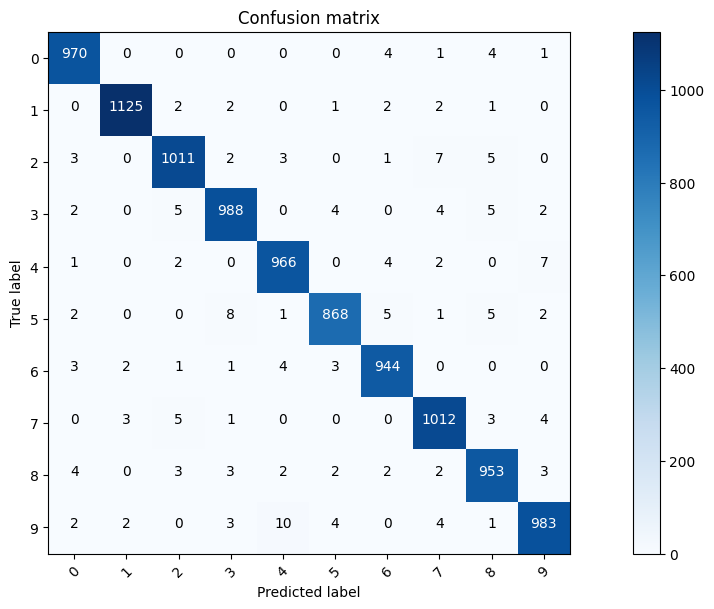

In [ ]:
plot_confusion_matrix(confusion, classes = range(10))

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.98      0.98      0.98      1010
           4       0.98      0.98      0.98       982
           5       0.98      0.97      0.98       892
           6       0.98      0.99      0.98       958
           7       0.98      0.98      0.98      1028
           8       0.98      0.98      0.98       974
           9       0.98      0.97      0.98      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



In [ ]:
from numpy import asarray
from PIL import Image
# Local  das imagens de 10 dígitos feitos no paint (0.png, 1.png...., 9.png)
path='Colab Notebooks/images/'
# Crio uma cópia nova do banco de dados de teste, sem que aponte para o mesmo objecto:
X_test_new = np.copy(X_test)
X_test_sc_new = np.copy(X_test_sc)
y_test_new = np.copy(y_test)
# Carregando as imagens (0.png, 1.png...., 9.png)
for i in range(10):
  img_num=str(i)+'.png'
  img1=Image.open(path + img_num)
  img1.thumbnail((28,28))
  img2=img1.convert(mode='L')
  img3=asarray(img2)
  img3 = 255 - img3
  # salvo as 10 imagens novas nas primeiras posições de X_test_new
  X_test_new[i] = img3
  #X_test_flat_new[i] = X_test_new[i].reshape(-1, 28*28)
  X_test_sc_new[i] = X_test_new[i] / 255
  y_test_new[i] = i

In [ ]:
# função para visualização das predições (examples: 28*28 pixels)
def show_predict(examples, targets, predict_):
    init = 0
    plt.figure(figsize=(8, 8))

    for i in range(64):
        plt.subplot(8, 8, i+1)
        plt.imshow(examples[init + i], cmap='Greys')
        plt.xlabel(f'y: {targets[init + i]} - ŷ: {predict_[init + i]}', size = 9)
        plt.xticks([])
        plt.yticks([])

    plt.tight_layout()
    plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


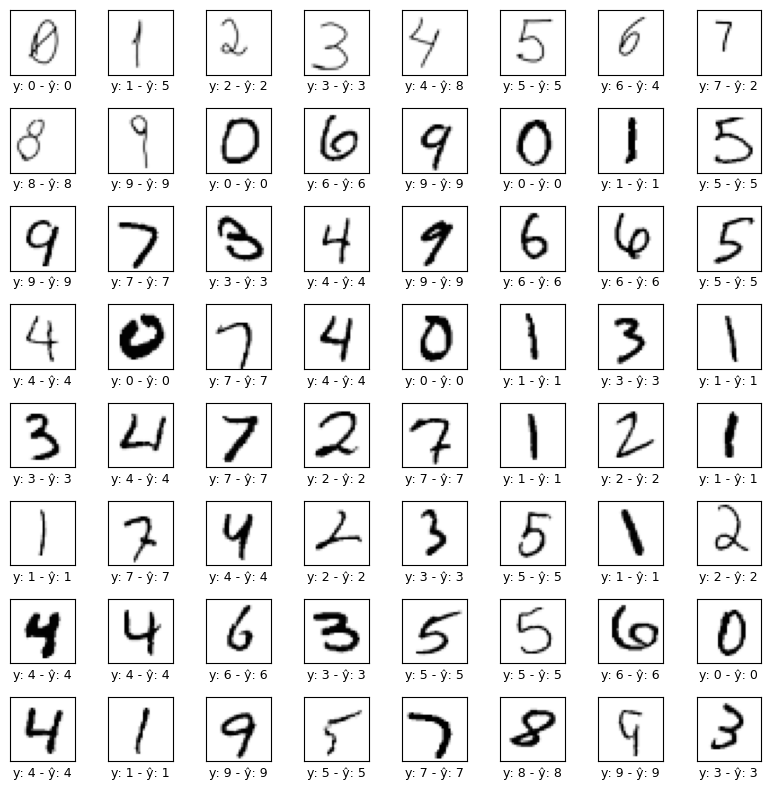

In [ ]:
# predição dos 10 dígitos feitos no paint
prediction_new = model1.predict(X_test_sc_new)
y_predict_new = np.argmax(prediction_new,axis=1)
show_predict(X_test_new, y_test_new, y_predict_new)

In [ ]:
# verificando a probabilidade de acerto/erro da previsão
amostra = 8;
print('y_predict_new[amostra] =', prediction_new[amostra])
print('Soma dos valores de predição da amostra:', prediction_new[amostra].sum())
print('Posição do maior valor numérico:', prediction_new[amostra].argmax())
print('Probalidade de acerto: %.3f%%' %(prediction_new[amostra].max()*100))
print('Label y_test_new[amostra] =', y_test_new[amostra])

y_predict_new[amostra] = [3.5852738e-04 3.3891105e-04 3.7589356e-02 3.9877519e-03 2.9724082e-03
 4.7004145e-01 6.4386986e-04 1.4440168e-03 4.8189265e-01 7.3108793e-04]
Soma dos valores de predição da amostra: 1.0
Posição do maior valor numérico: 8
Probalidade de acerto: 48.189%
Label y_test_new[amostra] = 8


##Segundo modelo

In [ ]:
model2=load_model(2)
model2.summary()

Loaded model from disk


Model: "regularized_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1024)           │       803,840 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,494,156 (5.70 MB)

 Trainable params: 1,494,154 (5.70 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [ ]:
# utilizando o modelo para fazer as predições
prediction2 = model2.predict(X_test_sc)
y_predict2 = np.argmax(prediction2,axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


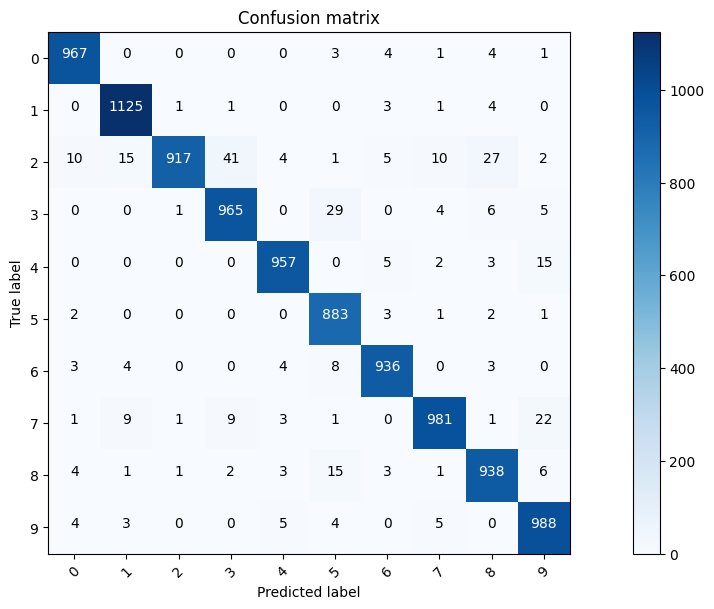

In [ ]:
confusion2 = confusion_matrix(y_test, y_predict2)
plot_confusion_matrix(confusion2, classes = range(10))

In [ ]:
from sklearn.metrics import accuracy_score
acc=accuracy_score(y_test, y_predict2)
print('Accuracy: %.1f%%' % (acc*100))

Accuracy: 96.6%


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


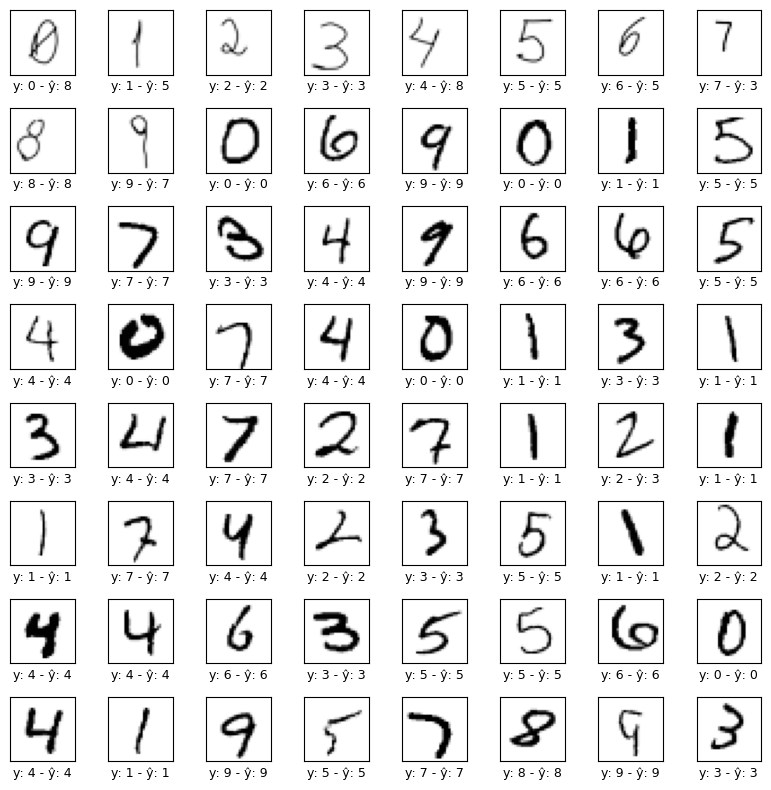

In [ ]:
prediction_new2 = model2.predict(X_test_sc_new)
y_predict_new2 = np.argmax(prediction_new2,axis=1)
show_predict(X_test_new, y_test_new, y_predict_new2)

In [ ]:
# verificando a probabilidade de acerto/erro da previsão
amostra = 6;
print('y_predict_new[amostra] =', prediction_new2[amostra])
print('Soma dos valores de predição da amostra:', prediction_new2[amostra].sum())
print('Posição do maior valor numérico:', prediction_new2[amostra].argmax())
print('Probalidade de acerto: %.3f%%' %(prediction_new2[amostra].max()*100))
print('Label y_test_new[amostra] =', y_test_new[amostra])

y_predict_new[amostra] = [0.11071395 0.01242997 0.00488714 0.00629916 0.15365346 0.25739896
 0.18056212 0.00811282 0.12373667 0.14220573]
Soma dos valores de predição da amostra: 0.99999994
Posição do maior valor numérico: 5
Probalidade de acerto: 25.740%
Label y_test_new[amostra] = 6


##Terceiro modelo

In [ ]:
model3=load_model(3)
model3.summary()

Loaded model from disk


Model: "dropout_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1024)           │       803,840 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,494,156 (5.70 MB)

 Trainable params: 1,494,154 (5.70 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [ ]:
# utilizando o modelo para fazer as predições
prediction3 = model3.predict(X_test_sc)
y_predict3 = np.argmax(prediction3,axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


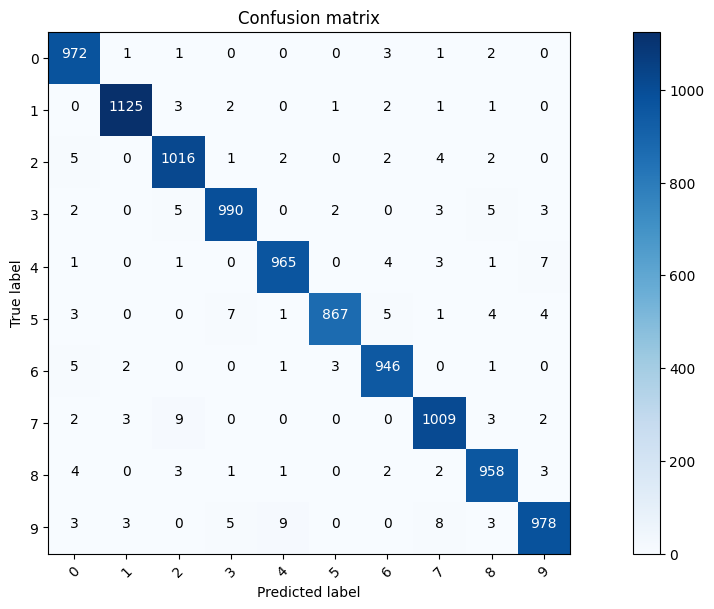

In [ ]:
# matriz de confusão
confusion3 = confusion_matrix(y_test, y_predict3)
plot_confusion_matrix(confusion3, classes = range(10))

In [ ]:
acc=accuracy_score(y_test, y_predict3)
print('Accuracy: %.1f%%' % (acc*100))

Accuracy: 98.3%


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


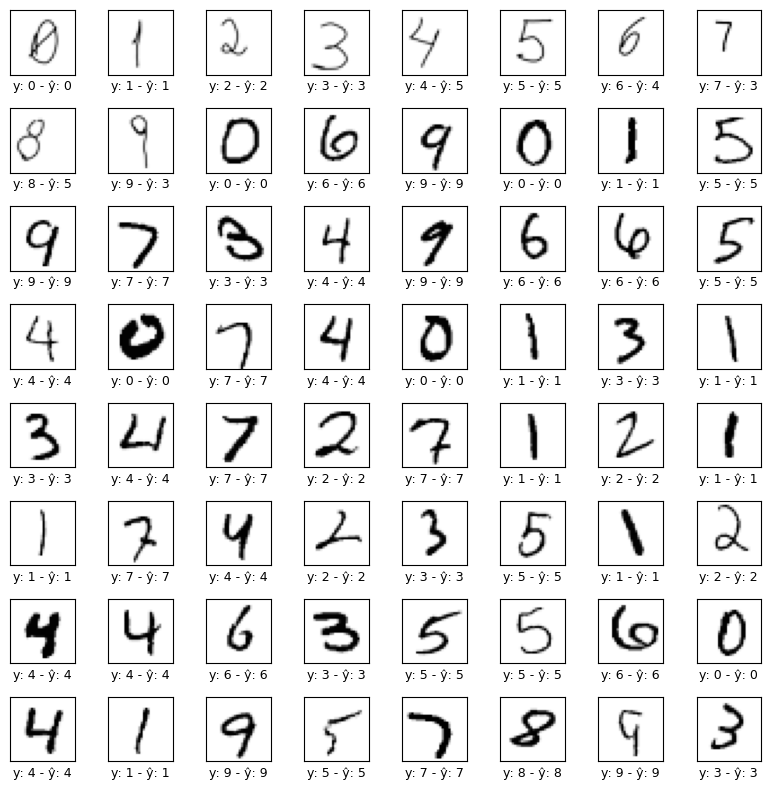

In [ ]:
prediction_new3 = model3.predict(X_test_sc_new)
y_predict_new3 = np.argmax(prediction_new3,axis=1)
show_predict(X_test_new, y_test_new, y_predict_new3)

In [ ]:
# verificando a probabilidade de acerto/erro da previsão.
amostra = 8;
print('y_predict_new[amostra] =', prediction_new3[amostra])
print('Soma dos valores de predição da amostra:', prediction_new3[amostra].sum())
print('Posição do maior valor numérico:', prediction_new3[amostra].argmax())
print('Probalidade de acerto: %.3f%%' %(prediction_new3[amostra].max()*100))
print('Label y_test_new[amostra] =', y_test_new[amostra])

y_predict_new[amostra] = [0.01516879 0.00858387 0.01474726 0.03898186 0.01593192 0.5295017
 0.01879796 0.00552459 0.28654397 0.06621803]
Soma dos valores de predição da amostra: 0.9999999
Posição do maior valor numérico: 5
Probalidade de acerto: 52.950%
Label y_test_new[amostra] = 8


##Exercícios
1. Carregue os modelos restantes que foram treinados no notebook anterior (Deep Learning #4).
1. Monte uma tabela comparativa mostrando a acurácia de cada modelo. Qual modelo obteve melhor desempenho?
1. Teste o banco de dados de dígitos novos que você montou e avalie qual modelo obteve melhores previsões.
1. Treine novamente os modelos com os melhores resultados com objetivo de atingir acurácia em o mais próximo de 100% no banco de dados de testes.
1. Apresente os resultados e os comentários.

# Respostas

In [ ]:
'''
1 - Carregue os modelos restantes que foram treinados no notebook anterior (Deep Learning #4).
'''
import pickle

with open('ex_4.pickle', 'rb') as handle:
    atv_24_models = pickle.load(handle)

atv_24_models


{'Deep1_20_32_Adagrad_0.1': <Sequential name=Deep1, built=True>,
 'Deep1_20_32_Adagrad_0.05': <Sequential name=Deep1, built=True>,
 'Deep1_20_32_SGD_0.1': <Sequential name=Deep1, built=True>}

In [ ]:
'''
2 - Monte uma tabela comparativa mostrando a acurácia de cada modelo. Qual modelo obteve melhor desempenho?
'''

import pandas as pd
ex2_models = atv_24_models
ex2_models['model_1'] = model1
ex2_models['model_2'] = model2
ex2_models['model_3'] = model3

results = {}

for m in ex2_models.keys():
  p =  np.argmax(ex2_models[m].predict(X_test_sc),axis=1)
  acc=accuracy_score(p,y_test)
  print('Model:',m,'Accuracy: %.1f%%' % (acc*100))
  results[m] = acc

df = pd.DataFrame.from_dict(results,orient='index')
df


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Model: Deep1_20_32_Adagrad_0.1 Accuracy: 98.4%
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Model: Deep1_20_32_Adagrad_0.05 Accuracy: 98.4%
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Model: Deep1_20_32_SGD_0.1 Accuracy: 98.4%
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Model: model_1 Accuracy: 98.2%
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Model: model_2 Accuracy: 96.6%
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Model: model_3 Accuracy: 98.3%


,0
Deep1_20_32_Adagrad_0.1,0.9840
Deep1_20_32_Adagrad_0.05,0.9840
Deep1_20_32_SGD_0.1,0.9840
model_1,0.9820
model_2,0.9657
model_3,0.9826


In [ ]:
from PIL import Image
from numpy import asarray
import albumentations as A
import random
img = 'Colab Notebooks/images/{d}.png'
i = 0

X_test_new2 = np.zeros((50, 28, 28))
X_test_flat_new2 = X_test_new2.reshape(-1, 28*28)
X_test_sc_new2 = X_test_flat_new2 / 255
y_test_new2 = np.zeros((50))


def data_augmentation(data):
  image = np.array(data)
  random.seed(7)
  images = [data,
            A.VerticalFlip(p=1)(image=image)['image'],
            A.Rotate(-30)(image=image)['image'],
            A.Rotate(-95)(image=image)['image'],
            A.Rotate(70)(image=image)['image']

           ]
  return images

for d in range(10):
  image_file = img.replace("{d}", str(d))

  img1=Image.open(image_file)
  img1.thumbnail((28,28))
  img2=img1.convert(mode='L')
  img3=asarray(img2)
  img3 = 255 - img3
  img_to_import = data_augmentation(img3)
  for im in img_to_import:
    X_test_new2[i] = im
    X_test_flat_new2[i] = X_test_new2[i].reshape(-1, 28*28)
    X_test_sc_new2[i] = X_test_flat_new2[i] / 255
    y_test_new2[i] = d
    i += 1


# função para visualização das predições (examples: 28*28 pixels)
def show_predict_ex2(examples, targets, predict_):
    init = 0
    plt.figure(figsize=(10, 10))

    for i in range(49):
        plt.subplot(8, 8, i+1)
        plt.imshow(examples[init + i], cmap='Greys')
        plt.xlabel(f'y: {targets[init + i]} - ŷ: {predict_[init + i]}', size = 9)
        plt.xticks([])
        plt.yticks([])

    plt.tight_layout()
    plt.show()


In [ ]:
X_test_sc_new2.shape

(50, 784)

In [ ]:
'''
3 - Teste o banco de dados de dígitos novos que você montou e avalie qual modelo obteve melhores previsões.
4 - Treine novamente os modelos com os melhores resultados com objetivo de atingir acurácia em o mais próximo de 100% no banco de dados de testes.
5 - Apresente os resultados e os comentários.
'''

results_ex3 = {}

for m in ex2_models.keys():
  p =  np.argmax(ex2_models[m].predict(X_test_sc_new2.reshape(50,28,28)),axis=1)
  acc=accuracy_score(p,y_test_new2)
  print('Model:',m,'Accuracy: %.1f%%' % (acc*100))
  results_ex3[m] = acc

df = pd.DataFrame.from_dict(results_ex3,orient='index')
df



2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Model: Deep1_20_32_Adagrad_0.1 Accuracy: 34.0%
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Model: Deep1_20_32_Adagrad_0.05 Accuracy: 34.0%
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Model: Deep1_20_32_SGD_0.1 Accuracy: 34.0%
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Model: model_1 Accuracy: 42.0%
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Model: model_2 Accuracy: 32.0%
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Model: model_3 Accuracy: 36.0%


,0
Deep1_20_32_Adagrad_0.1,0.34
Deep1_20_32_Adagrad_0.05,0.34
Deep1_20_32_SGD_0.1,0.34
model_1,0.42
model_2,0.32
model_3,0.36


# Tanto os modelos treinados na lista anterior, como os três modelos desta possuem um ótimo desempenho. Entretanto, não funcionaram bem para o banco de dados recriado e diversos erros ocorreram na tentativa de treiná-los para o novo banco de dados
